In [1]:
import requests
import json
import os
# from dotenv import load_dotenv
# load_dotenv()

# TOKEN = os.getenv("TOKEN")
import pandas as pd

In [2]:
jan_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet')
feb_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-02.parquet')

In [3]:
jan_df.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0


We can do two models here  
    - `duration`  
    - `amount of money`  
But will start of duration model

In [4]:
jan_df['VendorID'].value_counts()

VendorID
2    2234632
1     729732
6        260
Name: count, dtype: int64

In [5]:
jan_df['tpep_dropoff_datetime'] = pd.to_datetime(jan_df['tpep_dropoff_datetime'])
jan_df['tpep_pickup_datetime'] = pd.to_datetime(jan_df['tpep_pickup_datetime'])
jan_df['duration'] = (jan_df['tpep_dropoff_datetime'] - jan_df['tpep_pickup_datetime'])

jan_df['duration'] = jan_df['duration'].dt.total_seconds() / 60

In [6]:
jan_df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
count,2.964624e+06,2964624,2964624,2.824462e+06,2.964624e+06,2.824462e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.824462e+06,2.824462e+06,2.964624e+06
mean,1.754204e+00,2024-01-17 00:46:36.431092,2024-01-17 01:02:13.208130,1.339281e+00,3.652169e+00,2.069359e+00,1.660179e+02,1.651167e+02,1.161271e+00,1.817506e+01,1.451598e+00,4.833823e-01,3.335870e+00,5.270212e-01,9.756319e-01,2.680150e+01,2.256122e+00,1.411611e-01,1.561295e+01
min,1.000000e+00,2002-12-31 22:59:39,2002-12-31 23:05:41,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-8.990000e+02,-7.500000e+00,-5.000000e-01,-8.000000e+01,-8.000000e+01,-1.000000e+00,-9.000000e+02,-2.500000e+00,-1.750000e+00,-1.356667e+01
25%,2.000000e+00,2024-01-09 15:59:19.750000,2024-01-09 16:16:23,1.000000e+00,1.000000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.538000e+01,2.500000e+00,0.000000e+00,7.150000e+00
50%,2.000000e+00,2024-01-17 10:45:37.500000,2024-01-17 11:03:51.500000,1.000000e+00,1.680000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.280000e+01,1.000000e+00,5.000000e-01,2.700000e+00,0.000000e+00,1.000000e+00,2.010000e+01,2.500000e+00,0.000000e+00,1.163333e+01
75%,2.000000e+00,2024-01-24 18:23:52.250000,2024-01-24 18:40:29,1.000000e+00,3.110000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.050000e+01,2.500000e+00,5.000000e-01,4.120000e+00,0.000000e+00,1.000000e+00,2.856000e+01,2.500000e+00,0.000000e+00,1.868333e+01
max,6.000000e+00,2024-02-01 00:01:15,2024-02-02 13:56:52,9.000000e+00,3.127223e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,5.000000e+03,1.425000e+01,4.000000e+00,4.280000e+02,1.159200e+02,1.000000e+00,5.000000e+03,2.500000e+00,1.750000e+00,9.455400e+03
std,4.325902e-01,NaN,NaN,8.502817e-01,2.254626e+02,9.823219e+00,6.362391e+01,6.931535e+01,5.808686e-01,1.894955e+01,1.804102e+00,1.177600e-01,3.896551e+00,2.128310e+00,2.183645e-01,2.338558e+01,8.232747e-01,4.876239e-01,3.485105e+01


I will limit the duration to 1 min - 90 mins (1 hour and 30 minutes)
- Longer durations can be solved later

In [7]:
jan_df[jan_df['duration'] > 60]['duration'].quantile(0.95)

927.893333333324

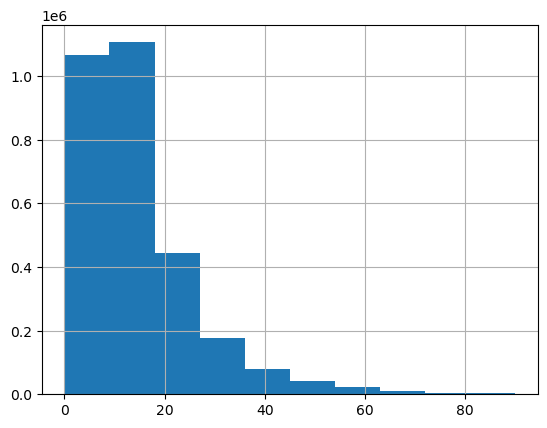

In [8]:
jan_df.query('duration > 0 and duration <= 90')['duration'].hist();

Looks reasonable distribution.  
Let's look at location codes `PULocationID` and `DOLocationID`, which is pick up and drop off location ids respectively

In [9]:
jan_df['PULocationID'].nunique(), jan_df['DOLocationID'].nunique()

(260, 261)

In [10]:
jan_df['PULocationID'] = jan_df['PULocationID'].astype(str)
jan_df['DOLocationID'] = jan_df['DOLocationID'].astype(str)

In [11]:
jan_df['PU_DO'] = jan_df['PULocationID'] + "_" + jan_df['DOLocationID']

- we have created this much location
- We can try later to keep each column as it's and encode it.

In [12]:
# we have created this much location
jan_df['PU_DO'].nunique()

26335

In [13]:
jan_df.isna().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          140162
trip_distance                 0
RatecodeID               140162
store_and_fwd_flag       140162
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     140162
Airport_fee              140162
duration                      0
PU_DO                         0
dtype: int64

In [14]:
140162 / jan_df.shape[0]

0.04727817085741733

<AxesSubplot: >

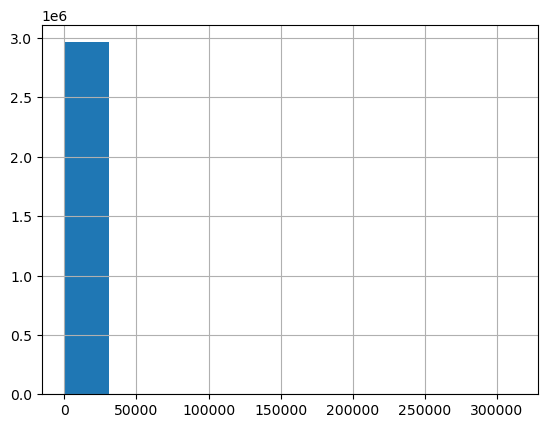

In [15]:
jan_df['trip_distance'].hist()

In [16]:
jan_df['trip_distance'].quantile(1)

312722.3

In [17]:
jan_df.sort_values('tpep_pickup_datetime')

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration,PU_DO
53119,2,2002-12-31 22:59:39,2002-12-31 23:05:41,1.0,0.63,1.0,N,170,170,3,...,0.00,-0.5,0.00,0.00,-1.0,-10.50,-2.5,0.00,6.033333,170_170
53120,2,2002-12-31 22:59:39,2002-12-31 23:05:41,1.0,0.63,1.0,N,170,170,3,...,0.00,0.5,0.00,0.00,1.0,10.50,2.5,0.00,6.033333,170_170
2558056,2,2009-01-01 00:24:09,2009-01-01 01:13:00,2.0,10.88,1.0,N,138,264,2,...,9.25,0.5,0.00,6.94,1.0,68.29,0.0,0.00,48.850000,138_264
1230169,2,2009-01-01 23:30:39,2009-01-02 00:01:39,1.0,10.99,1.0,N,237,264,2,...,3.50,0.5,0.00,0.00,1.0,50.00,0.0,0.00,31.000000,237_264
10915,2,2009-01-01 23:58:40,2009-01-02 00:01:40,1.0,0.46,1.0,N,137,264,2,...,3.50,0.5,0.00,0.00,1.0,9.40,0.0,0.00,3.000000,137_264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2822366,1,2024-01-31 23:59:54,2024-02-01 00:30:47,1.0,5.60,1.0,N,132,216,3,...,1.75,0.5,0.00,0.00,1.0,32.85,0.0,1.75,30.883333,132_216
2823129,2,2024-01-31 23:59:55,2024-02-01 00:09:38,1.0,1.66,1.0,N,68,246,1,...,1.00,0.5,2.00,0.00,1.0,19.10,2.5,0.00,9.716667,68_246
2822693,2,2024-02-01 00:00:17,2024-02-01 00:20:13,1.0,8.93,1.0,N,138,152,2,...,6.00,0.5,0.00,6.94,1.0,52.79,0.0,1.75,19.933333,138_152
2822633,2,2024-02-01 00:00:39,2024-02-01 00:12:08,5.0,2.22,1.0,N,186,79,1,...,1.00,0.5,3.70,0.00,1.0,22.20,2.5,0.00,11.483333,186_79


In [18]:
numerical = ['trip_distance']
categorical = ['PU_DO']
target = 'duration'

cols = numerical + categorical + [target]

In [19]:
def preprocess_df(df: pd.DataFrame, select_cols: list) -> pd.DataFrame:
    df = df.copy()

    df = df[df['Airport_fee'].notna()]
    
    df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
    df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])

    # Convert to minutes
    df['duration'] = df['duration'].dt.total_seconds() / 60

    df = df.query('duration > 0 and duration <= 90')

    df = df.reset_index(drop=True)

    df['PULocationID'] = df['PULocationID'].astype(str)
    df['DOLocationID'] = df['DOLocationID'].astype(str)

    df['PU_DO'] = df['PULocationID'] + "_" + df['DOLocationID']
    
    # we will sort them
    df = df.sort_values('tpep_pickup_datetime')
    return df[select_cols]

In [20]:
clean_jan_df = preprocess_df(jan_df, select_cols=cols)
clean_feb_df = preprocess_df(feb_df, select_cols=cols)

In [21]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import r2_score, mean_squared_error

In [22]:
train_dict = clean_jan_df[categorical + numerical].to_dict(orient="records")
test_dict = clean_feb_df[categorical + numerical].to_dict(orient="records")

dict_vectorizer = DictVectorizer()

X_train = dict_vectorizer.fit_transform(train_dict)
X_test = dict_vectorizer.transform(test_dict)

In [23]:
y_train = clean_jan_df[target].values
y_test = clean_feb_df[target].values

In [30]:
lr_model = LinearRegression()
xgb_model = XGBRegressor()
catboost_model = CatBoostRegressor(iterations=300, verbose=0)
lgbm_model = LGBMRegressor()

In [26]:
lr_model.fit(X_train, y_train)
preds = lr_model.predict(X_test)
rmse = mean_squared_error(y_test, preds) ** 1 / 2
r2 = r2_score(y_test, preds)
rmse, r2

(21.189245823972964, 0.6945520297963983)

In [27]:
xgb_model.fit(X_train, y_train)
preds = xgb_model.predict(X_test)
rmse = mean_squared_error(y_test, preds) ** 1 / 2
r2 = r2_score(y_test, preds)
rmse, r2

(19.018748934290517, 0.7258402537754067)

In [28]:
lgbm_model.fit(X_train, y_train)
preds = lgbm_model.predict(X_test)
rmse = mean_squared_error(y_test, preds) ** 1 / 2
r2 = r2_score(y_test, preds)
rmse, r2

(19.007917548621265, 0.7259963907514299)

In [31]:
catboost_model.fit(X_train, y_train)
preds = catboost_model.predict(X_test)
rmse = mean_squared_error(y_test, preds) ** 1 / 2
r2 = r2_score(y_test, preds)
rmse, r2

(18.23656548209671, 0.7371156125014422)